In [ ]:
"""
*RNN이용한 텍스트 분류
1. 제목 열 추출
2. 공백 분리(nltk,keras..)/ 형태소 분리(konlpy)
3. 불용어 제거, 조사,...., 정규표현식
4. 유일한 단어 ->길이(코러스 크기)                        --->데이터 준비
5. 각 단어 숫자 부여                               
6. 가장 긴 문장 길이 조사(ex:30개)
7. 모든 문장 길이는 동일하게
----------------------------->RNN 기반은 이와같은 데이터 준비 과정 필요
1. time step?
2. word dim?                               ---->LSTM/RNN 설계
3. batch_size 
4. LSTM셀 출력 차원

*Fast Text ->Word2Vec의 확장판 느낌
-> 하나의 단어 안에도 연러 단어들이 존재하는것으로 간주                                
->n=1,2,3,..으로 설정해 단어를 나눠주고 전체 단어를 특별토큰으로 둬서(# 특별 토큰 <apple>)
n = 3인 경우
<ap, app, ppl, ple, le>, <apple>

Elmo -> 양방향 모델 두개 결합

BERT -> 모델 한개로 양방향 특징을 모두 학습
"""

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)  
#num_words=1000 -> 로이터 뉴스 8982에 대해 가장 많이 언급된 1000개 단어들로 구성 

2110848/2110848 [==============================] - 0s 0us/step


In [8]:
X_train.shape  #8982편의 뉴스기사가 있음
X_train[0]  #첫번째 뉴스기사, 숫자로 인코딩 되어있음(리스트)
len(X_train[1]) #뉴스 기사 길이가 모두 다름
y_train  #뉴스기사 카테고리, 46개의 카테고리

8982

In [11]:
np.max(y_train)

45

In [12]:
np.min(y_train)

0

In [14]:
#모든 문장의 최대 길이를 100으로 정함
#y_train 원핫인코딩(46차원)

56

In [15]:
#패딩 하는 함수, 최대 길이 100으로 설정
X_train=sequence.pad_sequences(X_train, maxlen=100)
X_test=sequence.pad_sequences(X_test, maxlen=100)

In [16]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [17]:
model=Sequential()

In [18]:
#임베딩은 선택임
model.add(Embedding(1000,100)) #-> 1000을 100차원으로

In [19]:
model.add(LSTM(100)) #->출력을 100차원으로

In [20]:
model.add(Dense(46,activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=5)

In [24]:
#fit 할때 validation 데이터를 지정해줘도 된다
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 21s 43ms/step - loss: 2.2110 - accuracy: 0.4453 - val_loss: 1.8765 - val_accuracy: 0.5298
Epoch 2/200
450/450 [==============================] - 19s 42ms/step - loss: 1.8422 - accuracy: 0.5350 - val_loss: 1.7172 - val_accuracy: 0.5650
Epoch 3/200
450/450 [==============================] - 19s 42ms/step - loss: 1.6462 - accuracy: 0.5766 - val_loss: 1.6048 - val_accuracy: 0.5913
Epoch 4/200
450/450 [==============================] - 19s 42ms/step - loss: 1.5177 - accuracy: 0.6060 - val_loss: 1.5271 - val_accuracy: 0.6171
Epoch 5/200
450/450 [==============================] - 19s 42ms/step - loss: 1.3918 - accuracy: 0.6466 - val_loss: 1.4128 - val_accuracy: 0.6416
Epoch 6/200
450/450 [==============================] - 19s 43ms/step - loss: 1.2503 - accuracy: 0.6816 - val_loss: 1.2951 - val_accuracy: 0.6701
Epoch 7/200
450/450 [==============================] - 20s 44ms/step - loss: 1.1162 - accuracy: 0.7163 - val_loss: 1.2251 - val_ac

In [25]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 19ms/step - loss: 1.2205 - accuracy: 0.7257

 Test Accuracy: 0.7257


In [ ]:
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_split=0.2, callbacks=[early_stopping_callback])
#X_train,y_train데이터에 대해 20%를 검증(Validation)용으로 사용

In [ ]:
#############################################################

In [26]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv("tsla.us.txt")

In [59]:
data.head()
data.shape
data.describe()
data.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [60]:
training_size = int(len(data)*0.80)
data_len = len(data)

In [61]:
train, test = data[0:training_size],data[training_size:data_len]

In [62]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  1486
total length of data -->  1858
Train length -->  1486
Test length -->  372


In [63]:
train = train.loc[:, ["Open"]].values

In [64]:
train

array([[ 17.  ],
       [ 19.  ],
       [ 25.79],
       ...,
       [213.62],
       [216.99],
       [219.87]])

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [66]:
train_scaled

array([[0.00316724],
       [0.01053291],
       [0.03553935],
       ...,
       [0.72728612],
       [0.73969727],
       [0.75030383]])

In [67]:
end_len = len(train_scaled)
end_len

1486

In [68]:
X_train = []
y_train = []
timesteps = 40

In [69]:
for i in range(timesteps, end_len):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

In [70]:
X_train, y_train= np.array(X_train), np.array(y_train)

In [71]:
train_scaled[0:40,0] #40일간의 시가
train_scaled[40,0] #40+1일째의 시가 

0.01145361470187456

In [72]:
X_train.shape

(1446, 40)

In [73]:
y_train.shape

(1446,)

In [74]:
#rnn : 입력 데이터의 구조를 3차원으로 해야 함
X_train

array([[0.00316724, 0.01053291, 0.03553935, ..., 0.0088388 , 0.00924391,
        0.01086436],
       [0.01053291, 0.03553935, 0.03262991, ..., 0.00924391, 0.01086436,
        0.01145361],
       [0.03553935, 0.03262991, 0.02526424, ..., 0.01086436, 0.01145361,
        0.01112216],
       ...,
       [0.79633926, 0.73524104, 0.79354031, ..., 0.70714102, 0.71045557,
        0.71082385],
       [0.73524104, 0.79354031, 0.78720583, ..., 0.71045557, 0.71082385,
        0.72728612],
       [0.79354031, 0.78720583, 0.80635657, ..., 0.71082385, 0.72728612,
        0.73969727]])

In [75]:
X_train=np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [76]:
X_train.shape
#(1446, 40, 1)
#(데이터 개수, timestep, dimension)

(1446, 40, 1)

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [78]:
regressor = Sequential()

In [79]:
regressor.add(SimpleRNN(units=50, activation='tanh',return_sequences=True, input_shape=(X_train.shape[1], 1)))      
#(출력차원, 활설화함수, return, 40,1)
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh',return_sequences=True))  
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh',return_sequences=True))  
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh'))  
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1)) #출력 1개

In [80]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")  #예측값 이므로 mse를 loss로 잡음

In [81]:
epochs = 100 
batch_size = 20

In [82]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
73/73 [==============================] - 3s 13ms/step - loss: 0.3239
Epoch 2/100
73/73 [==============================] - 1s 13ms/step - loss: 0.1744
Epoch 3/100
73/73 [==============================] - 1s 17ms/step - loss: 0.0931
Epoch 4/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0609
Epoch 5/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0458
Epoch 6/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0380
Epoch 7/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0316
Epoch 8/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0276
Epoch 9/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0262
Epoch 10/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0215
Epoch 11/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0201
Epoch 12/100
73/73 [==============================] - 1s 13ms/step - loss: 0.0170
Epoch 13/100
73/73 [=====

In [83]:
real_price = test.loc[:, ["Open"]].values #테스트 데이터의 싯가만 추출해서 real_price에 넣음

In [87]:
dataset_total=pd.concat([data['Open'],test['Open']],axis=0)
dataset_total

0        17.00
1        19.00
2        25.79
3        25.00
4        23.00
         ...  
1853    307.00
1854    301.02
1855    305.50
1856    302.50
1857    302.50
Name: Open, Length: 2230, dtype: float64

In [94]:
inputs=dataset_total[len(dataset_total)-len(test)-timesteps:].values.reshape(-1,1)
inputs

array([[380.25 ],
       [380.   ],
       [373.   ],
       [374.9  ],
       [366.49 ],
       [353.15 ],
       [350.93 ],
       [349.9  ],
       [339.88 ],
       [341.86 ],
       [342.52 ],
       [335.9  ],
       [351.25 ],
       [356.   ],
       [353.1  ],
       [349.65 ],
       [346.8  ],
       [353.89 ],
       [352.95 ],
       [356.98 ],
       [353.76 ],
       [350.91 ],
       [355.97 ],
       [355.56 ],
       [352.69 ],
       [349.88 ],
       [338.8  ],
       [336.7  ],
       [327.78 ],
       [319.75 ],
       [319.18 ],
       [320.23 ],
       [332.25 ],
       [300.13 ],
       [299.5  ],
       [307.   ],
       [301.02 ],
       [305.5  ],
       [302.5  ],
       [302.5  ],
       [216.6  ],
       [217.91 ],
       [220.5  ],
       [224.99 ],
       [223.04 ],
       [221.48 ],
       [219.59 ],
       [220.   ],
       [218.   ],
       [222.24 ],
       [233.8  ],
       [234.98 ],
       [227.39 ],
       [219.5  ],
       [218.88 ],
       [21

In [93]:
inputs.shape

(412, 1)

In [95]:
inputs=scaler.transform(inputs)

In [96]:
inputs

array([[1.3409568 ],
       [1.34003609],
       [1.31425625],
       [1.32125364],
       [1.290281  ],
       [1.24115199],
       [1.2329761 ],
       [1.22918278],
       [1.19228078],
       [1.19957279],
       [1.20200346],
       [1.1776231 ],
       [1.23415461],
       [1.25164807],
       [1.24096785],
       [1.22826207],
       [1.21776599],
       [1.24387729],
       [1.24041542],
       [1.25525725],
       [1.24339852],
       [1.23290244],
       [1.25153758],
       [1.25002762],
       [1.23945789],
       [1.22910912],
       [1.18830332],
       [1.18056937],
       [1.14771848],
       [1.11814532],
       [1.11604611],
       [1.11991309],
       [1.16418075],
       [1.04588812],
       [1.04356793],
       [1.07118919],
       [1.04916584],
       [1.06566494],
       [1.05461643],
       [1.05461643],
       [0.73826097],
       [0.74308548],
       [0.75262402],
       [0.76915995],
       [0.76197842],
       [0.7562332 ],
       [0.74927264],
       [0.750

In [98]:
X_test=[]
for i in range(timesteps,412):
    X_test.append(inputs[i-timesteps:i, 0])

In [99]:
X_test=np.array(X_test)

In [100]:
print(X_test.shape)  #372개의 데이터

(372, 40)


In [101]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [103]:
pred=regressor.predict(X_test)

12/12 [==============================] - 0s 6ms/step


In [105]:
pred
pred.shape

(372, 1)

In [106]:
pred=scaler.inverse_transform(pred)
pred

array([[281.8165 ],
       [241.32175],
       [230.80705],
       [235.67789],
       [240.14252],
       [237.75978],
       [234.51833],
       [236.30522],
       [235.18272],
       [236.86356],
       [234.53273],
       [238.97098],
       [241.56105],
       [239.67264],
       [235.00769],
       [232.27853],
       [233.12428],
       [232.62103],
       [231.87842],
       [230.6825 ],
       [232.59999],
       [222.28278],
       [215.34038],
       [210.87425],
       [207.85251],
       [212.74121],
       [215.48549],
       [221.03989],
       [220.05132],
       [222.72525],
       [223.58331],
       [224.28456],
       [226.6608 ],
       [229.12422],
       [233.277  ],
       [234.66438],
       [235.8005 ],
       [235.60376],
       [233.84279],
       [236.2193 ],
       [238.6287 ],
       [238.82445],
       [236.60052],
       [236.69653],
       [239.79196],
       [241.85103],
       [240.77881],
       [241.35194],
       [245.11876],
       [243.39485],


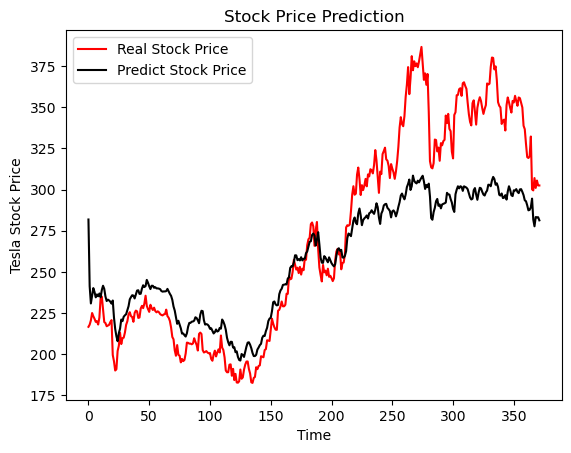

In [107]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(pred, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

In [ ]:
#1. LSTM 병경, 비교
#2. 관심있는 회사에 대해 예측 모델
